# Titans survival

**Import libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix , roc_auc_score , accuracy_score , roc_curve , auc
from sklearn.preprocessing import StandardScaler


**Reading file**

In [3]:
data = pd.read_csv('titanic.csv')
df = data.copy()

**Understanding the data**

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**checking duplicates**

In [12]:
print(df.duplicated().sum())

0


**Cleaning data**

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
df['Age']=df['Age'].fillna(0)
df['Cabin']=df['Cabin'].fillna('NaN').inplace=True
df.dropna(subset=['Embarked'],inplace=True)

In [22]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [35]:
x = df.drop(['Survived','Name','Sex','Ticket','Cabin','Embarked'],axis=1)
y = df['Survived']

In [36]:
# splitting data 
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [37]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

**Train model**

In [38]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [39]:
y_pred = model.predict(x_test)

### Evalution

In [43]:
cm = confusion_matrix(y_test, y_pred)
cf = classification_report(y_test , y_pred)

# printing the evaluation properly
print('classification_report:\n',cf)
print('confusion_matrix:\n',cm)


classification_report:
               precision    recall  f1-score   support

           0       0.74      0.87      0.80       167
           1       0.69      0.49      0.57       100

    accuracy                           0.73       267
   macro avg       0.71      0.68      0.69       267
weighted avg       0.72      0.73      0.71       267

confusion_matrix:
 [[145  22]
 [ 51  49]]


In [ ]:
y_pred_prob = model.predict_proba(x_test)[:,1]
roc_auc = roc_auc_score(y_test,y_pred_prob)
fpr,tpr, _ = roc_curve(y_test,y_pred_prob)

In [47]:
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1])

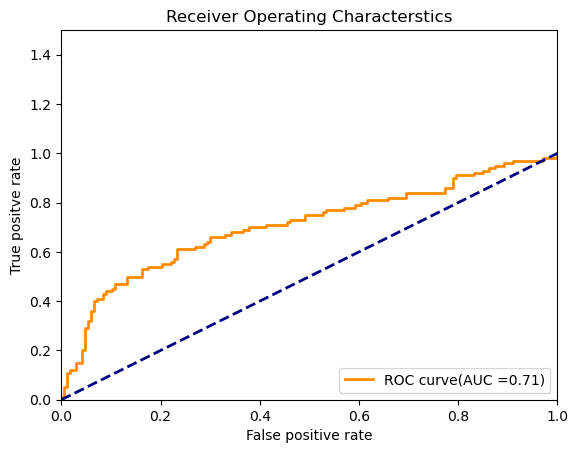

In [51]:
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=2,label=f'ROC curve(AUC ={roc_auc:.2f})')
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.5])
plt.xlabel('False positive rate')
plt.ylabel('True positve rate')
plt.title('Receiver Operating Characterstics')
plt.legend(loc='lower right')
plt.show()

## Here is my Titanic Survival Prediction – Model Conclusion
I developed a logistic regression model to predict passenger survival on the Titanic dataset. The model achieved an accuracy of 73% and an AUC of 0.71, indicating fair discriminatory power between survivors and non-survivors. The ROC curve confirms that the model performs significantly better than random guessing, with a reasonable balance between sensitivity and specificity.
While the model is more effective at identifying non-survivors, further improvements—such as feature engineering or threshold tuning—could enhance its ability to detect true survival cases. This project demonstrates my ability to build, evaluate, and interpret classification models with real-world impact.



